In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import numpy as np 
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os
from cv2 import imread, createCLAHE 
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:

train_dir = os.path.join('../content/drive/MyDrive/Garbage classification dataset/Garbage classification')


In [4]:
labels = ['cardboard','glass','metal', 'paper', 'plastic', 'trash']
for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 403
Images of label "glass":	 501
Images of label "metal":	 410
Images of label "paper":	 594
Images of label "plastic":	 482
Images of label "trash":	 137


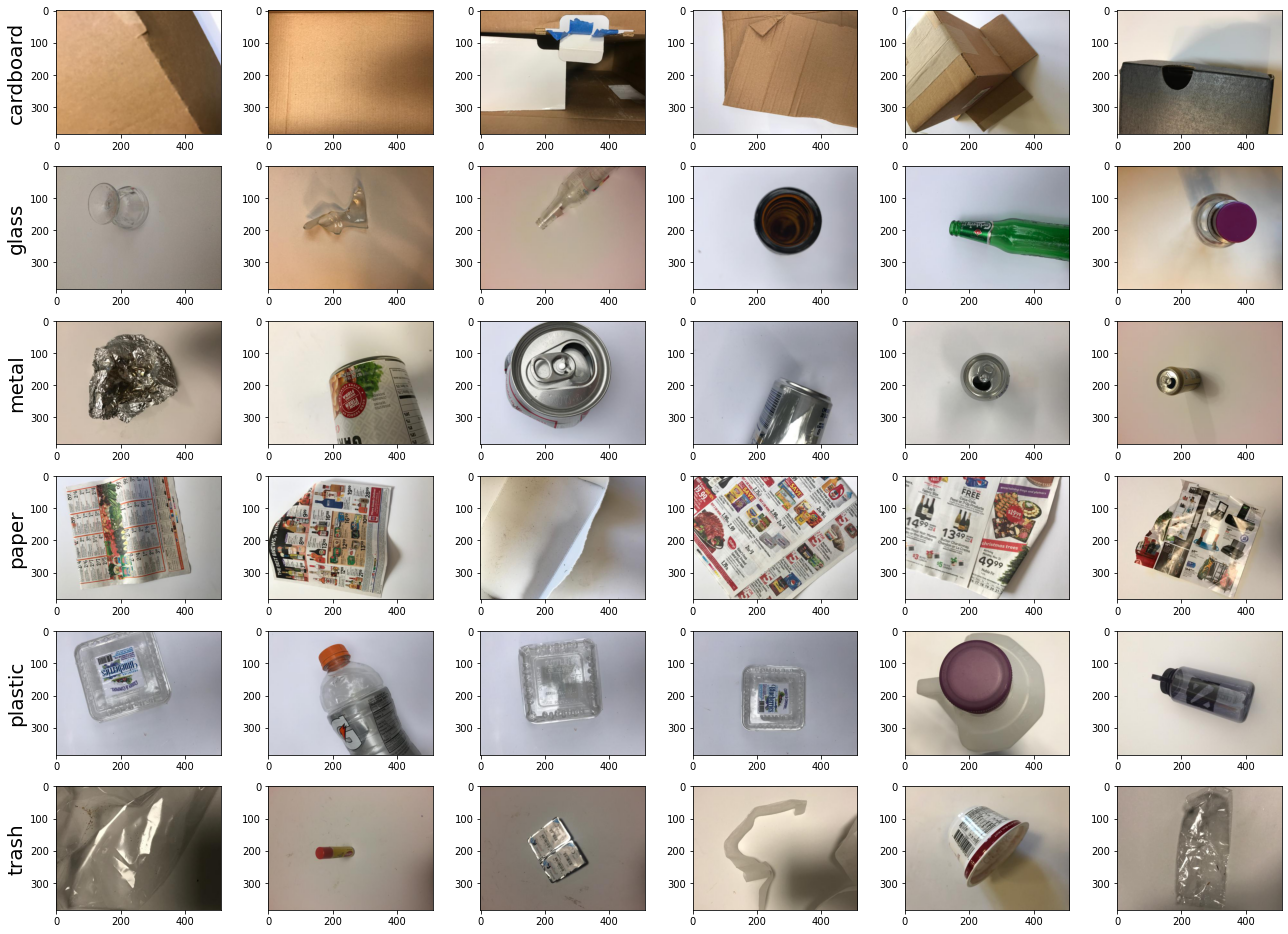

In [5]:
plt.figure(figsize=(30,15))

for i in range(len(labels)):
    directory = os.path.join(train_dir, labels[i])
    for j in range(6):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(7, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
#plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [6]:
#size of a single image

directory = os.path.join(train_dir, 'paper')
path = os.path.join(directory, os.listdir(directory)[5])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

In [7]:
# creating the model of CNN

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),

  tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 382, 510, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 382, 510, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 380, 508, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 380, 508, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 190, 254, 32)     0         
 )                                                               
                                                        

In [8]:
# creating generators for combining data and increasing the gainable insights by slightly modifying the images in the dataset

train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='validation')

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])

In [10]:
# callback function to give it a boost for the accuracy to be improved
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [11]:
history = model.fit(train_generator, epochs=15, verbose=1, validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/15
64/64 [==============================] - 182s 2s/step - loss: 1.9665 - accuracy: 0.4323 - val_loss: 3.2261 - val_accuracy: 0.1988
Epoch 2/15
64/64 [==============================] - 145s 2s/step - loss: 1.4410 - accuracy: 0.5044 - val_loss: 3.3759 - val_accuracy: 0.1909
Epoch 3/15
64/64 [==============================] - 146s 2s/step - loss: 1.3122 - accuracy: 0.5499 - val_loss: 2.8406 - val_accuracy: 0.1988
Epoch 4/15
64/64 [==============================] - 143s 2s/step - loss: 1.2220 - accuracy: 0.5613 - val_loss: 2.8097 - val_accuracy: 0.2107
Epoch 5/15
64/64 [==============================] - 163s 3s/step - loss: 1.2264 - accuracy: 0.5741 - val_loss: 2.7916 - val_accuracy: 0.2406
Epoch 6/15
64/64 [==============================] - 147s 2s/step - loss: 1.1079 - accuracy: 0.6013 - val_loss: 3.0483 - val_accuracy: 0.2505
Epoch 7/15
64/64 [==============================] - 145s 2s/step - loss: 1.1153 - accuracy: 0.6052 - val_loss: 1.9064 - val_accuracy: 0.3260
Epoch 8/15
64

Text(0, 0.5, 'LOSS')

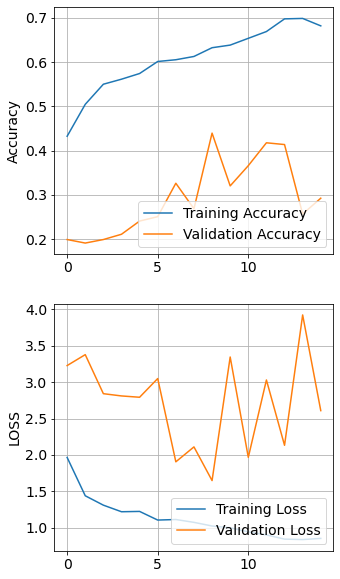

In [12]:
# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


# plot results
# accuracy
plt.figure(figsize=(5, 10))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('LOSS')




Enter any category by index: 3
Enter any index to test: 86
1/1 [==============================] - 1s 963ms/step


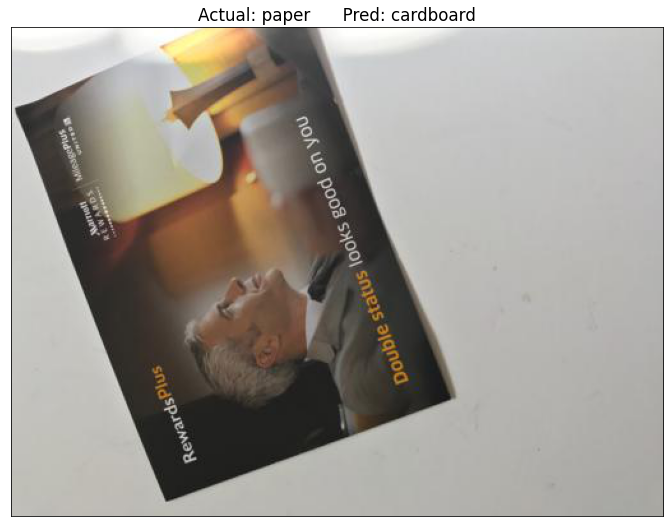

In [13]:
cat = int(input('Enter any category by index: '))
ind = int(input('Enter any index to test: '))

directory = os.path.join(train_dir, labels[cat % 6])
try:
    path = os.path.join(directory, os.listdir(directory)[ind])
    img = mpimg.imread(path)
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    pred = labels[np.argmax(classes)]
    
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title('Actual: {}      Pred: {}'.format(labels[cat], pred))
    
except:
    print('Invalid Value')